In [227]:
import sympy as sp
import numpy as np

Будем искать смешанные стратегии как пару из векторов: 


Стратегией первого игрока будет вектор $\bar{\bold{a}} = (a_1, a_2, ..., a_n)$

Стратегией второго игрока будет вектор $\bar{\bold{b}} = (b_1, b_2, ..., b_n)$

Определим функции для поиска равновесий при $n = 2$ и $n = 3$.

In [235]:
def _solve2(reward_matrix_A, reward_matrix_B):
    reward_matrix_A = np.transpose(reward_matrix_A)
    reward_matrix_B = np.transpose(reward_matrix_B)
    
    a1, a2, b1, b2 = sp.symbols('a1 a2 b1 b2')
    lambda1, lambda2 = sp.symbols('lambda1 lambda2')
    mu1, mu2, mu3, mu4 = sp.symbols('mu1 mu2 mu3 mu4')

    f_A = reward_matrix_A[0][0]*a1*b1 + reward_matrix_A[0][1]*a1*b2 + \
          reward_matrix_A[1][0]*a2*b1 + reward_matrix_A[1][1]*a2*b2
    
    f_B = reward_matrix_B[0][0]*a1*b1 + reward_matrix_B[0][1]*a1*b2 + \
          reward_matrix_B[1][0]*a2*b1 + reward_matrix_B[1][1]*a2*b2

    h1 = a1 + a2 - 1
    h2 = b1 + b2 - 1
    
    g1 = -a1
    g2 = -a2
    g3 = -b1
    g4 = -b2

    L_A = (-f_A + lambda1 * h1 + lambda2 * h2
        + mu1 * g1 + mu2 * g2 + mu3 * g3 + mu4 * g4)

    L_B = (-f_B + lambda1 * h1 + lambda2 * h2
        + mu1 * g1 + mu2 * g2 + mu3 * g3 + mu4 * g4)

    stationarity_conditions = [
        sp.diff(L_A, a1),
        sp.diff(L_A, a2),
        
        sp.diff(L_B, b1),
        sp.diff(L_B, b2),
    ]
    
    primal_feasibility = [h1, h2]

    complementary_slackness = [
        mu1 * g1,
        mu2 * g2,
        mu3 * g3,
        mu4 * g4,
    ]
    
    # Solve the KKT system
    solution = sp.solve(
        stationarity_conditions + primal_feasibility + complementary_slackness,
        [a1, a2, b1, b2, lambda1, lambda2, mu1, mu2, mu3, mu4],
        dict=True
    )

    solution = filter(lambda sol: sol[mu1] >= 0 and sol[mu2] >= 0 and sol[mu3] >= 0 and sol[mu4] >= 0, solution)
    
    solution = filter(lambda sol: sol[a1] >= 0 and sol[a2] >= 0 and sol[b1] >= 0 and sol[b2] >= 0, solution) 

    return [(sol[a1], sol[a2], sol[b1], sol[b2]) for sol in solution]

In [229]:
import sympy as sp

def _solve3(reward_matrix_A, reward_matrix_B):
    reward_matrix_A = np.transpose(reward_matrix_A)
    reward_matrix_B = np.transpose(reward_matrix_B)
    
    a1, a2, a3, b1, b2, b3 = sp.symbols('a1 a2 a3 b1 b2 b3')
    lambda1, lambda2 = sp.symbols('lambda1 lambda2')
    mu1, mu2, mu3, mu4, mu5, mu6 = sp.symbols('mu1 mu2 mu3 mu4 mu5 mu6')

    f_A = reward_matrix_A[0][0]*a1*b1 + reward_matrix_A[0][1]*a1*b2 + reward_matrix_A[0][2]*a1*b3 + \
          reward_matrix_A[1][0]*a2*b1 + reward_matrix_A[1][1]*a2*b2 + reward_matrix_A[1][2]*a2*b3 + \
          reward_matrix_A[2][0]*a3*b1 + reward_matrix_A[2][1]*a3*b2 + reward_matrix_A[2][2]*a3*b3
    
    f_B = reward_matrix_B[0][0]*a1*b1 + reward_matrix_B[0][1]*a1*b2 + reward_matrix_B[0][2]*a1*b3 + \
          reward_matrix_B[1][0]*a2*b1 + reward_matrix_B[1][1]*a2*b2 + reward_matrix_B[1][2]*a2*b3 + \
          reward_matrix_B[2][0]*a3*b1 + reward_matrix_B[2][1]*a3*b2 + reward_matrix_B[2][2]*a3*b3

    h1 = a1 + a2 + a3 - 1
    h2 = b1 + b2 + b3 - 1
    
    g1 = -a1
    g2 = -a2
    g3 = -a3
    
    g4 = -b1
    g5 = -b2
    g6 = -b3

    L_A = (-f_A + lambda1 * h1 + lambda2 * h2
        + mu1 * g1 + mu2 * g2 + mu3 * g3 + mu4 * g4 + mu5 * g5 + mu6 * g6)

    L_B = (-f_B + lambda1 * h1 + lambda2 * h2
        + mu1 * g1 + mu2 * g2 + mu3 * g3 + mu4 * g4 + mu5 * g5 + mu6 * g6)

    stationarity_conditions = [
        sp.diff(L_A, a1),
        sp.diff(L_A, a2),
        sp.diff(L_A, a3),
        
        sp.diff(L_B, b1),
        sp.diff(L_B, b2),
        sp.diff(L_B, b3),
    ]
    
    primal_feasibility = [h1, h2]

    complementary_slackness = [
        mu1 * g1,
        mu2 * g2,
        mu3 * g3,
        mu4 * g4,
        mu5 * g5,
        mu6 * g6
    ]
    
    # Solve the KKT system
    solution = sp.solve(
        stationarity_conditions + primal_feasibility + complementary_slackness,
        [a1, a2, a3, b1, b2, b3, lambda1, lambda2, mu1, mu2, mu3, mu4, mu5, mu6],
        dict=True
    )

    solution = filter(lambda sol: sol[mu1] >= 0 and sol[mu2] >= 0 and sol[mu3] >= 0 and sol[mu4] >= 0 and sol[mu5] >= 0 and sol[mu6] >= 0, solution)
    
    solution = filter(lambda sol: sol[a1] >= 0 and sol[a2] >= 0 and sol[a3] >= 0 and sol[b1] >= 0 and sol[b2] >= 0 and sol[b3] >= 0, solution) 

    return [(sol[a1], sol[a2], sol[a3], sol[b1], sol[b2], sol[b3]) for sol in solution]

### 1.а
### Камень ножницы бумага

In [230]:
reward_matrix_A = [[0, -1, 1],
                   [1, 0, -1],
                   [-1, 1, 0]] # Матрица вознаграждений игрока A

reward_matrix_B = [[0, 1, -1],
                   [-1, 0, 1],
                   [1, -1, 0]] # Матрица вознаграждений игрока B

for i, sol in enumerate(_solve3(reward_matrix_A, reward_matrix_B)):
    a1, a2, a3, b1, b2, b3 = sol
    print(f'Equilibria number {i+1} at: a = {a1, a2, a3}; b = {b1, b2, b3}')

Equilibria number 1 at: a = (1/3, 1/3, 1/3); b = (1/3, 1/3, 1/3)


### 1.б
### Дилемма заключенных

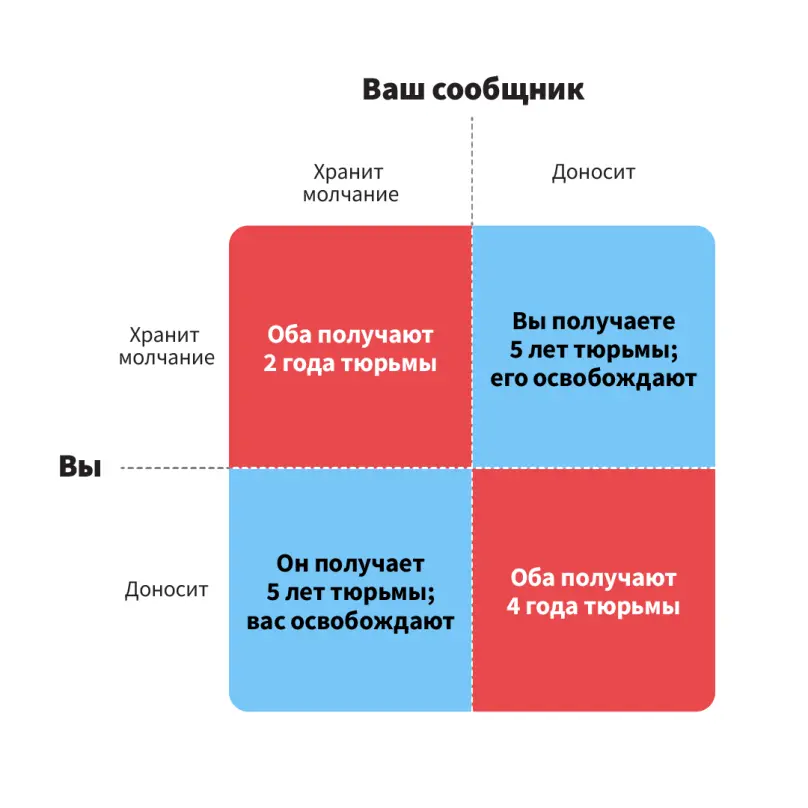

In [231]:
reward_matrix_A = [[-2, -5],
                   [0, -4]]  # Матрица вознаграждений игрока A

reward_matrix_B = [[-2, 0],
                   [-5, -4]] # Матрица вознаграждений игрока B

for i, sol in enumerate(_solve2(reward_matrix_A, reward_matrix_B)):
    a1, a2, b1, b2 = sol
    print(f'Equilibria number {i+1} at: a = {a1, a2}; b = {b1, b2}')

Equilibria number 1 at: a = (1, 0); b = (1, 0)


### 1.в
### Семейный спор

In [232]:
reward_matrix_A = [[3, 0],
                   [0, 2]] # Матрица вознаграждений игрока A

reward_matrix_B = [[1, 0],
                   [0, 5]] # Матрица вознаграждений игрока B

for i, sol in enumerate(_solve2(reward_matrix_A, reward_matrix_B)):
    a1, a2, b1, b2 = sol
    print(f'Equilibria number {i+1} at: a = {a1, a2}; b = {b1, b2}')

Equilibria number 1 at: a = (0, 1); b = (0, 1)
Equilibria number 2 at: a = (5/6, 1/6); b = (2/5, 3/5)
Equilibria number 3 at: a = (1, 0); b = (1, 0)


## 2.
## Два пальца

In [234]:
reward_matrix_A = [[2, -3],
                   [-3, 4]] # Матрица вознаграждений игрока A

reward_matrix_B = [[-2, 3],
                   [3, -4]] # Матрица вознаграждений игрока B

for i, sol in enumerate(_solve2(reward_matrix_A, reward_matrix_B)):
    a1, a2, b1, b2 = sol
    print(f'Equilibria number {i+1} at: a = {a1, a2}; b = {b1, b2}')

Equilibria number 1 at: a = (7/12, 5/12); b = (7/12, 5/12)
